In [2]:
setwd('/Users/luli/Desktop/wisc/628/module2')
data<-read.csv("data_cleaned.csv",header=TRUE)
data<-data[,c(2,4:17)]

Load the data 

# Use Mallows' Cp to do the variable selection

Since the Full model is having unsignificant variables. And our aim is to find a model with good performance but 
also convenient to compute with. So We need to use some methods to do the variable selection. 

In this part, we implement a statistic Mallows' Cp to do the variable selection.

The definition for the Mallows' Cp is : $$\mathrm{C}_{p}=\frac{\operatorname{RSS}(p)}{\sigma^{2}}-N+2 p$$



The $\sigma^{2}$  can be derived from the MSE(Mean Squared Error) from the full model. And the ${RSS}(p)$ is the sum of squared errors for the model with p predictors.

So we would like to find the model which the expected value of Mallow's Cp is close to p+1. That is the $\frac{\operatorname{RSS}(p)}{\sigma^{2}} $is close to   N-(P+1) and the  ${RSS}(p)$ is close to the sum of squared errors of the full model, which means the reduced model performs as good as the full model but with less predictors.

## Split the model into train set and test set

We randomly split the data set into train set and test set with proportion 3:1.

In [3]:
set.seed(628)
train_row <- sample(nrow(data), (3/4)*nrow(data), replace = FALSE)
train_set <- data[train_row,]
test_set <- data[-train_row,]
dim(train_set)
dim(test_set)

[1] 184  15

[1] 62 15

Using the regsubsets function in leaps package, we aim to find out the best models under different number of predictors with exhaustive search.

In [4]:
library("leaps")
m1<-regsubsets(train_set$BODYFAT~.,data=train_set,nbest=1,method = "exhaustive",nvmax=14)
sm1<-summary(m1)
cbind(sm1$which, round(cbind(rsq=sm1$rsq,rss=sm1$rss,adjr2=sm1$adjr2,cp=sm1$cp,bic=sm1$bic), 3))


(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,rss,adjr2,cp,bic
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.648,3349.982,0.646,45.153,-181.716
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.704,2812.902,0.701,11.056,-208.652
1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.717,2695.576,0.712,5.171,-211.277
1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0.719,2672.285,0.713,5.605,-207.659
1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.723,2634.726,0.715,5.081,-205.048
1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0.727,2599.171,0.718,4.691,-202.333
1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0.730,2571.531,0.719,4.834,-199.085
1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0.733,2541.437,0.721,4.811,-196.036
1,1,0,1,0,1,0,1,1,1,1,0,0,1,1,0.734,2532.960,0.720,6.241,-191.436
1,1,0,1,0,1,0,1,1,1,1,0,1,1,1,0.735,2525.417,0.719,7.734,-186.770


From the before table, we could see the perfromance of best models under different number of variables. To have a better look at our interested parameter Mallows' Cp, we draw plot of Mallows' Cp values versus the number of variables.

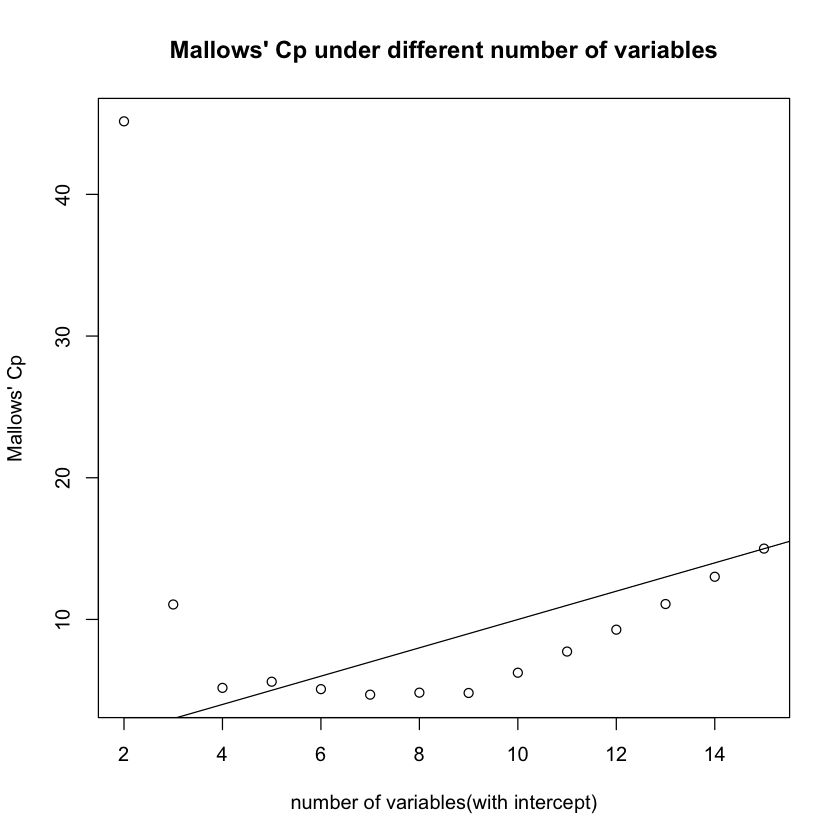

In [5]:
plot(2:15,sm1$cp,xlab="number of variables(with intercept)",ylab = "Mallows' Cp",main = "Mallows' Cp under different number of variables")
abline(a=0,b=1)

From the plot before, we could see that when the number of predictors equal to 5 or 6,  Mallows' Cp is close to or samller than the p+1 (the number of predictors including intercept). The R square and the adjusted R square of model with 6 predictors are just slightly bigger than the model with 5 predictors.  And the model with 5 predictors's BIC is lower.  

Considering the benefits of less variable and the value of BIC, we decide to choose the models with 5 predictors which are intercept, Weight, Abdomen, Thigh and Wrist as our optimal model.

# Fit model with selected variables

## Fit the model on the train set

In [7]:
head(train_set[,c(1,3,8,10,15)])

,BODYFAT,WEIGHT,ABDOMEN,THIGH,WRIST
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
161,15.2,140.00,83.4,52.4,16.5
182,9.2,167.50,83.7,57.3,18.2
214,23.9,199.25,100.0,63.9,19.2
241,29.1,215.50,107.6,63.3,18.8
175,28.8,241.25,110.3,69.8,18.4
12,8.5,216.00,90.9,66.2,19.0



Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + THIGH + WRIST, data = train_set[, 
    c(1, 3, 8, 10, 15)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4359 -2.6390 -0.1293  2.8008  9.1133 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.94707    8.58434  -2.906 0.004122 ** 
WEIGHT       -0.09897    0.03235  -3.059 0.002562 ** 
ABDOMEN       0.83447    0.05856  14.249  < 2e-16 ***
THIGH         0.24328    0.11379   2.138 0.033877 *  
WRIST        -1.63334    0.45496  -3.590 0.000427 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.864 on 179 degrees of freedom
Multiple R-squared:  0.7192,	Adjusted R-squared:  0.713 
F-statistic: 114.6 on 4 and 179 DF,  p-value: < 2.2e-16


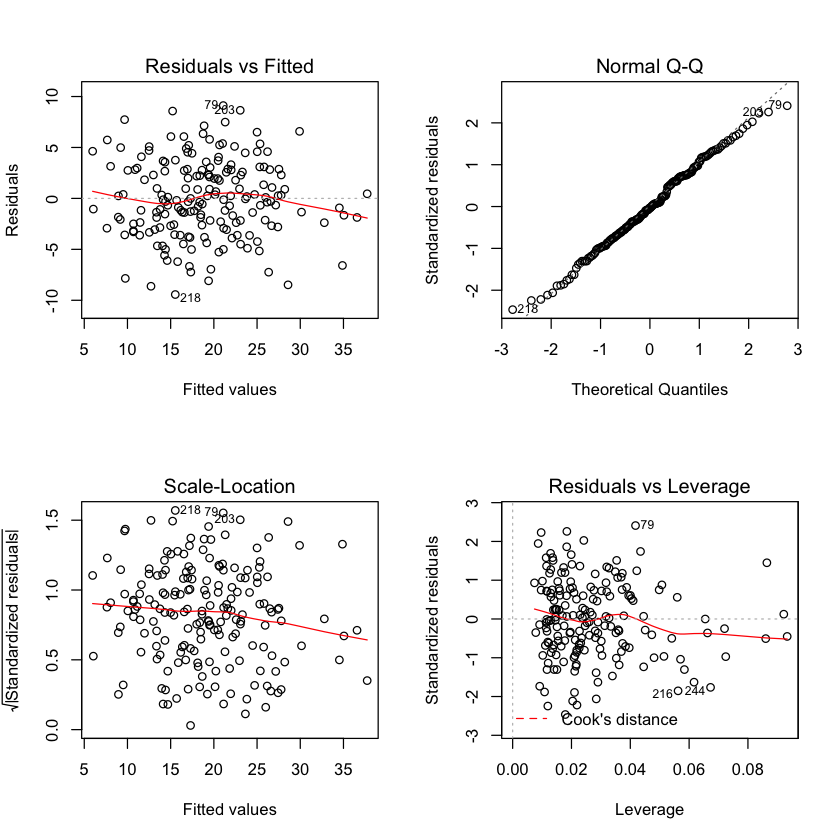

In [8]:
lm1<-lm(BODYFAT~WEIGHT+ABDOMEN+THIGH+WRIST,data=train_set[,c(1,3,8,10,15)])
summary(lm1)
s1<-summary(lm1)
pred_y_train<-predict(lm1,newdata=train_set[,c(3,8,10,15)])
mse_train<-mean((pred_y_train-train_set$BODYFAT)^2)
par(mfrow=c(2,2))
plot(lm1)

The Multiple R-squared is 0.7192  which means about 72% variance could be explained by the predictors and the Adjusted R-squared is 0.713. Since the p-value for the whole model is extremly less than $\alpha=0.05$, so we may reject the null hypothesis and conclude that the model is significant. And the p-values for the individual coefficients are all smaller than $\alpha=0.05$, so we may reject the corresponding hypothesis and conclude that all the coefficients are significantly not equal to zero.

From the first and third plot, we may belive that the constant variance assumption is true and the fitted values are independent from residuals. With the second plot, the residuals are roughly normaly distributed with a thinner tail than the normal distribution. From the last plot, there is no significant leverage point.

# Test the model on the test set

In [9]:
pred_y_test<-predict(lm1,newdata=test_set[,c(3,8,10,15)])
mse_test<-mean((pred_y_test-test_set$BODYFAT)^2)
sse_test<-sum((pred_y_test- test_set$BODYFAT)^2)
sst_test<-sum((test_set$BODYFAT-mean(test_set$BODYFAT))^2)
test_r2<-(sst_test-sse_test)/sst_test
test_adj_r2=1-((1-test_r2)*(dim(test_set)[1]-1))/(dim(test_set)[1]-3-1)
test_performance=data.frame(R_Square=test_r2, adjusted_R_Square= test_adj_r2, MSE=mse_test)
cat("models' performances on the test set: \n")
print(test_performance)

models' performances on the test set: 
   R_Square adjusted_R_Square      MSE
1 0.6979007         0.6822748 18.82484


Compare the performance on the train set and test set, we could get the below table.

In [10]:
performance = rbind(c(s1$r.squared,s1$adj.r.squared,mse_train),
                    c(test_r2,test_adj_r2,mse_test))
colnames(performance) = c("R-squared","Adjusted R-squared","MSE")
rownames(performance) = c("train_set","test_set")
print(performance)

          R-squared Adjusted R-squared      MSE
train_set 0.7192498          0.7129760 14.52329
test_set  0.6979007          0.6822748 18.82484


# Fit on the whole data set

In [11]:
lm2<-lm(BODYFAT~WEIGHT+ABDOMEN+THIGH+WRIST,data=data[,c(1,3,8,10,15)])
summary(lm2)
pred_y<-predict(lm2,newdata=data[,c(3,8,10,15)])
mse_whole<-mean((pred_y-data$BODYFAT)^2)
coefficients(summary(lm2))
cat("Adjusted R-squared:",summary(lm2)$adj.r.squared,"  R-squared:",summary(lm2)$r.squared,
    "  MSE:",mse_whole)



Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + THIGH + WRIST, data = data[, 
    c(1, 3, 8, 10, 15)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0582 -2.8721 -0.2196  2.9154  9.1651 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.47491    7.64655  -3.855 0.000149 ***
WEIGHT       -0.10654    0.02889  -3.688 0.000280 ***
ABDOMEN       0.87201    0.05182  16.828  < 2e-16 ***
THIGH         0.12623    0.10084   1.252 0.211875    
WRIST        -1.13417    0.41039  -2.764 0.006157 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.95 on 241 degrees of freedom
Multiple R-squared:  0.7199,	Adjusted R-squared:  0.7153 
F-statistic: 154.9 on 4 and 241 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-29.4749110,7.64654858,-3.854669,1.486922e-04
WEIGHT,-0.1065431,0.02889078,-3.687790,2.795569e-04
ABDOMEN,0.8720131,0.05181861,16.828185,1.505081e-42
THIGH,0.1262317,0.10084435,1.251748,2.118753e-01
WRIST,-1.1341669,0.41038864,-2.763641,6.157439e-03


Adjusted R-squared: 0.7152518   R-squared: 0.7199008   MSE: 15.28465

Since  the coefficient for THIGH is not significant, we will drop this predictor and refit the model.

In [13]:
lm3<-lm(BODYFAT~WEIGHT+ABDOMEN+WRIST,data=data[,c(1,3,8,15)])
summary(lm3)
pred_y<-predict(lm3,newdata=data[,c(3,8,15)])
mse_whole<-mean((pred_y-data$BODYFAT)^2)
coefficients(summary(lm3))
cat("Adjusted R-squared:",summary(lm3)$adj.r.squared,"  R-squared:",summary(lm3)$r.squared,
    "  MSE:",mse_whole)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = data[, 
    c(1, 3, 8, 15)])

Residuals:
   Min     1Q Median     3Q    Max 
-9.007 -2.901 -0.286  2.961  9.294 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.86797    6.20448  -3.847 0.000153 ***
WEIGHT       -0.08351    0.02230  -3.745 0.000225 ***
ABDOMEN       0.86989    0.05185  16.777  < 2e-16 ***
WRIST        -1.24546    0.40111  -3.105 0.002129 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.955 on 242 degrees of freedom
Multiple R-squared:  0.7181,	Adjusted R-squared:  0.7146 
F-statistic: 205.5 on 3 and 242 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-23.86796500,6.20448216,-3.846891,1.530561e-04
WEIGHT,-0.08350773,0.02229762,-3.745141,2.253849e-04
ABDOMEN,0.86989031,0.05185147,16.776578,1.996194e-42
WRIST,-1.24546008,0.40111071,-3.105028,2.129234e-03


Adjusted R-squared: 0.7145848   R-squared: 0.7180797   MSE: 15.38403

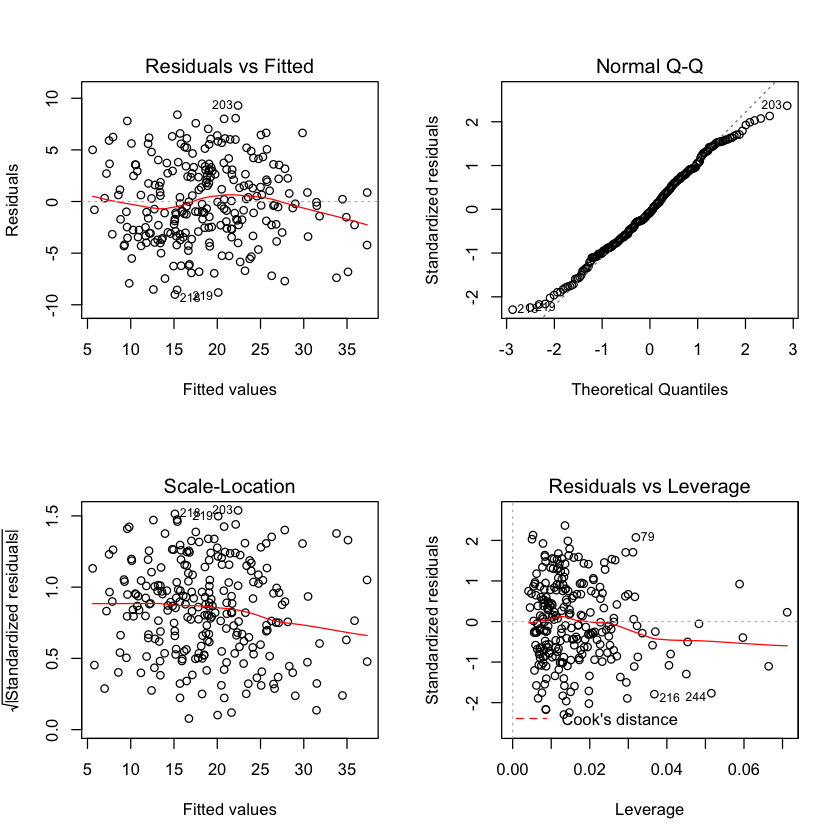

In [14]:
par(mfrow=c(2,2))
plot(lm3)